In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from getConfig import getConfig
from getModels import getModels

maxRGB = 255

In [2]:
def getData():
    train, test = tf.keras.datasets.mnist.load_data()
    return train, test

In [3]:
def reshape(X):
    ''' Keras requires a 4-dimensional array as input '''
    return X.reshape(X.shape[0], 28, 28, 1)

In [4]:
def retype(X):
    ''' Make sure we get a decimal result from division '''
    return X.astype('float32')

In [5]:
def normalize(X):
    ''' Divide by max RGB value '''
    X /= maxRGB
    return X

In [6]:
def formatX(X):
    X = reshape(X)
    X = retype(X)
    X = normalize(X)
    return X

In [7]:
def preProcess(test, config):
    ''' "test" is a tuple of X and Y '''
    testX, testY   = test
    testX          = formatX(testX)
    
    dataDict    = {}
    dataDict["testX"]  = testX
    dataDict["testY"]  = testY
    
    return dataDict

In [8]:
config = getConfig()
_, test = getData()
dataDict = preProcess(test, config)

In [9]:
models = getModels("NN", config)

In [10]:
for model in models:
    ''' Load the model and run Test through it '''
    m = tf.keras.models.load_model(filepath=model, compile=False)
    predictions = m.predict(np.array(dataDict["testX"]))
    predictions = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(dataDict["testY"],predictions)
    print("Accuracy against test set: {:.1%}".format(accuracy))

Accuracy against test set: 98.2%


##### Show some errors

In [11]:
mask = [predictions != dataDict["testY"]]
errs = np.argsort(mask[0])

In [12]:
def showImage(image, label, prediction):
    image = np.reshape(image, newshape=[28,28])
    plt.imshow(image, cmap='Greys')
    title = "Labeled as: "+ str(label)+" predicted as: " + str(prediction)
    plt.title(title)
    plt.show()

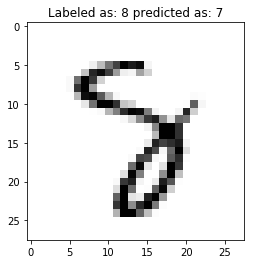

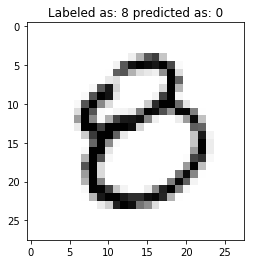

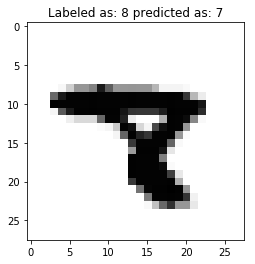

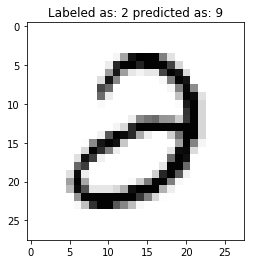

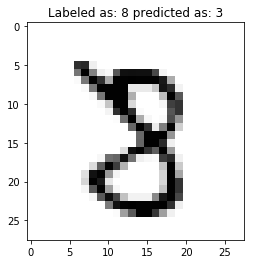

In [ ]:
index = 9990
for index in range(9900,9925):
    showImage(dataDict["testX"][errs[index]],\
              dataDict["testY"][errs[index]],\
              predictions[errs[index]])
    input()